In [1]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
import seaborn as sbn
import matplotlib as mpl
import numpy as np
%matplotlib inline

 ## Exploración de los datos

In [2]:
datos = pd.read_csv("Myocardial infarction complications Database.csv",header=0)
datos.head()

,ID,AGE,SEX,INF_ANAM,STENOK_AN,FK_STENOK,IBS_POST,IBS_NASL,GB,SIM_GIPERT,...,JELUD_TAH,FIBR_JELUD,A_V_BLOK,OTEK_LANC,RAZRIV,DRESSLER,ZSN,REC_IM,P_IM_STEN,LET_IS
0,1,77.0,1,2.0,1.0,1.0,2.0,NaN,3.0,0.0,...,0,0,0,0,0,0,0,0,0,0
1,2,55.0,1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
2,3,52.0,1,0.0,0.0,0.0,2.0,NaN,2.0,0.0,...,0,0,0,0,0,0,0,0,0,0
3,4,68.0,0,0.0,0.0,0.0,2.0,NaN,2.0,0.0,...,0,0,0,0,0,0,1,0,0,0
4,5,60.0,1,0.0,0.0,0.0,2.0,NaN,3.0,0.0,...,0,0,0,0,0,0,0,0,0,0


In [3]:
datos.drop(labels=['ID'],axis=1,inplace=True)

In [4]:
nombre_de_variables = datos.columns
print(nombre_de_variables)

Index(['AGE', 'SEX', 'INF_ANAM', 'STENOK_AN', 'FK_STENOK', 'IBS_POST',
       'IBS_NASL', 'GB', 'SIM_GIPERT', 'DLIT_AG',
       ...
       'JELUD_TAH', 'FIBR_JELUD', 'A_V_BLOK', 'OTEK_LANC', 'RAZRIV',
       'DRESSLER', 'ZSN', 'REC_IM', 'P_IM_STEN', 'LET_IS'],
      dtype='object', length=123)


In [5]:
variables_de_salida = datos.iloc[:,111:123]
variables_de_salida.head()


,FIBR_PREDS,PREDS_TAH,JELUD_TAH,FIBR_JELUD,A_V_BLOK,OTEK_LANC,RAZRIV,DRESSLER,ZSN,REC_IM,P_IM_STEN,LET_IS
0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,1,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0


In [6]:
variables_de_entrada = datos.iloc[:,0:111]
variables_de_entrada.head()

,AGE,SEX,INF_ANAM,STENOK_AN,FK_STENOK,IBS_POST,IBS_NASL,GB,SIM_GIPERT,DLIT_AG,...,NOT_NA_1_n,NOT_NA_2_n,NOT_NA_3_n,LID_S_n,B_BLOK_S_n,ANT_CA_S_n,GEPAR_S_n,ASP_S_n,TIKL_S_n,TRENT_S_n
0,77.0,1,2.0,1.0,1.0,2.0,NaN,3.0,0.0,7.0,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0
1,55.0,1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,1.0,0.0,1.0,1.0,1.0,0.0,1.0
2,52.0,1,0.0,0.0,0.0,2.0,NaN,2.0,0.0,2.0,...,3.0,2.0,2.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0
3,68.0,0,0.0,0.0,0.0,2.0,NaN,2.0,0.0,3.0,...,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0
4,60.0,1,0.0,0.0,0.0,2.0,NaN,3.0,0.0,7.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0


In [7]:
valores_faltantes = 100*datos.isnull().sum()/datos.shape[0]
valores_faltantes[valores_faltantes>0].sort_values() # hay valores faltantes en todas las variables

IM_PG_P        0.058824
INF_ANAM       0.235294
NA_R_1_n       0.294118
zab_leg_06     0.411765
zab_leg_04     0.411765
                ...    
NOT_NA_KB     40.352941
S_AD_KBRIG    63.294118
D_AD_KBRIG    63.294118
IBS_NASL      95.764706
KFK_BLOOD     99.764706
Length: 110, dtype: float64

In [8]:
valores_faltantes_entrada = 100*variables_de_entrada.isnull().sum()/datos.shape[0]
print(valores_faltantes_entrada[valores_faltantes_entrada>0].sort_values()) # hay valores faltantes en todas las variables


IM_PG_P        0.058824
INF_ANAM       0.235294
NA_R_1_n       0.294118
zab_leg_06     0.411765
zab_leg_04     0.411765
                ...    
NOT_NA_KB     40.352941
S_AD_KBRIG    63.294118
D_AD_KBRIG    63.294118
IBS_NASL      95.764706
KFK_BLOOD     99.764706
Length: 110, dtype: float64


In [9]:
valores_faltantes_salida = 100*variables_de_salida.isnull().sum()/datos.shape[0]
valores_faltantes_salida[valores_faltantes_salida>0].sort_values() # no hay valores faltantes en la salida

Series([], dtype: float64)

<Axes: >

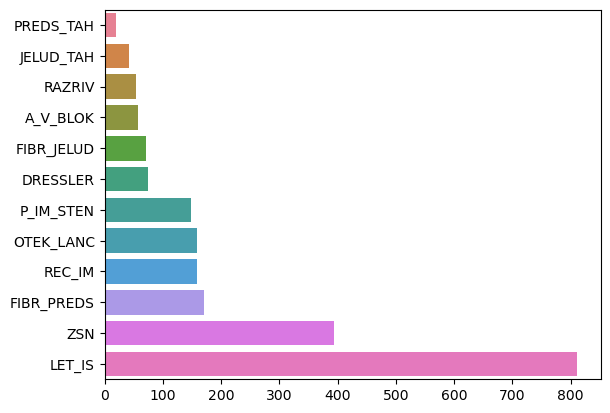

In [10]:
cantidad_de_variables_de_salida = variables_de_salida[variables_de_salida>0].sum().sort_values().to_frame().transpose()
sbn.barplot(cantidad_de_variables_de_salida,orient='h') 
# las 5 complicaciones más comunes, además de la muerte, son ZSN, FIBR_PREDS, REC_IM y OTEK_LANC

## Preparación de los datos

In [11]:
# se seleccionan solamente las 5 complicaciones de tipo binario con frecuencia más altas
nombres_de_las_cinco_complicaciones_binarias_mas_frecuentes = cantidad_de_variables_de_salida.iloc[:,-6:-1].columns
nombres_de_las_cinco_complicaciones_binarias_mas_frecuentes

Index(['P_IM_STEN', 'OTEK_LANC', 'REC_IM', 'FIBR_PREDS', 'ZSN'], dtype='object')

In [12]:
variables_de_salida_seleccionadas = variables_de_salida.loc[:,nombres_de_las_cinco_complicaciones_binarias_mas_frecuentes]

#### Tratamiento de datos faltantes

In [13]:
nombres_de_variables_de_entrada_con_mas_de_50_porciento_de_faltantes = valores_faltantes_entrada[valores_faltantes_entrada>50].sort_values().index
nombres_de_variables_de_entrada_con_mas_de_50_porciento_de_faltantes

Index(['S_AD_KBRIG', 'D_AD_KBRIG', 'IBS_NASL', 'KFK_BLOOD'], dtype='object')

In [14]:
#eliminar las variables de entrada con mas de 50% faltantes
variables_de_entrada.drop(labels=nombres_de_variables_de_entrada_con_mas_de_50_porciento_de_faltantes,axis=1,inplace=True)
variables_de_entrada.shape # se eliminaron las 4 columnas problemáticas

(1700, 107)

###### imputar data de las variables con valores faltantes

In [15]:
# para variables de tipo real segun la descrpcion del dataset 
nombres_de_variables_de_entrada_de_valores_reales = ['AGE',
                                                    'S_AD_ORIT',
                                                    'D_AD_ORIT',
                                                    'K_BLOOD',
                                                    'NA_BLOOD',
                                                    'ALT_BLOOD',
                                                    'L_BLOOD',
                                                    'ROE']
promedios_de_variables_de_entrada_de_valores_reales = variables_de_entrada.loc[:,nombres_de_variables_de_entrada_de_valores_reales].mean().to_dict()
variables_de_entrada.fillna(value=promedios_de_variables_de_entrada_de_valores_reales,inplace=True)
variables_de_entrada.loc[:,nombres_de_variables_de_entrada_de_valores_reales].isna().sum()
# ya no hay valores faltantes en estas columnas

AGE          0
S_AD_ORIT    0
D_AD_ORIT    0
K_BLOOD      0
NA_BLOOD     0
ALT_BLOOD    0
L_BLOOD      0
ROE          0
dtype: int64

In [16]:
# para variables de tipo categorico segun la descrpcion del dataset 
variables_de_entrada_de_valores_categoricos = variables_de_entrada.drop(labels=nombres_de_variables_de_entrada_de_valores_reales,axis=1)
nombres_de_variables_de_entrada_de_valores_categoricos = variables_de_entrada_de_valores_categoricos.columns
moda_variables_de_entrada_de_valores_categoricos = variables_de_entrada_de_valores_categoricos.mode().transpose().to_dict()[0]
variables_de_entrada.fillna(value=moda_variables_de_entrada_de_valores_categoricos,inplace=True)
variables_de_entrada.loc[:,nombres_de_variables_de_entrada_de_valores_categoricos].isna().sum().sum() 
# ya no hay valores faltantes en estas columnas

0

In [17]:
data = pd.concat([variables_de_entrada,variables_de_salida],axis=1)

In [18]:
variables_de_salida

,FIBR_PREDS,PREDS_TAH,JELUD_TAH,FIBR_JELUD,A_V_BLOK,OTEK_LANC,RAZRIV,DRESSLER,ZSN,REC_IM,P_IM_STEN,LET_IS
0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,1,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
1695,0,0,0,0,1,0,1,0,0,0,0,3
1696,0,0,0,0,0,0,0,0,0,0,0,1
1697,0,0,0,0,0,0,0,0,0,1,0,6
1698,0,0,0,0,0,1,0,0,0,0,0,1


## Clasificación según Narayan et. al. (2023)


In [19]:
from sklearn.neighbors import KNeighborsClassifier
etiquetas = variables_de_salida.iloc[:,:-1]
muerte = variables_de_salida['LET_IS']
caracteristicas = variables_de_entrada

In [20]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from sklearn.metrics import ConfusionMatrixDisplay

np.random.seed(20221102)

In [21]:
# Determinar el mejor valor de k para K vecinos cercanos basado en accuraccy (ORIGINAL)
from sklearn.model_selection import cross_val_score

mejor_param_k = 0
mejor_puntuacion = 0
for k in range(1, 11):
    modelo_knn = KNeighborsClassifier(n_neighbors = k)
    cv_scores = list()
    for etiqueta in etiquetas:
        resultados = cross_val_score(modelo_knn, caracteristicas, data[etiqueta], cv=10, scoring='accuracy')
        cv_scores.append(resultados.mean())
    nueva_puntuacion = np.average(cv_scores)
    print('Average for ', k, ': ', nueva_puntuacion)
    if nueva_puntuacion > mejor_puntuacion:
        mejor_puntuacion = nueva_puntuacion
        mejor_param_k = k
print('Best k:', mejor_param_k)
print('Score:', mejor_puntuacion)

Average for  1 :  0.8820320855614973
Average for  2 :  0.9222459893048128
Average for  3 :  0.913850267379679
Average for  4 :  0.9253475935828877
Average for  5 :  0.9215508021390374
Average for  6 :  0.9262566844919785
Average for  7 :  0.9245989304812835
Average for  8 :  0.9269518716577541
Average for  9 :  0.925668449197861
Average for  10 :  0.926951871657754
Best k: 8
Score: 0.9269518716577541


In [22]:
# Determinar el mejor valor de k para K vecinos cercanos basado en roc auc (CAMBIO en la métrica objetivo)
from sklearn.model_selection import cross_val_score

mejor_param_k = 0
mejor_puntuacion = 0
for k in range(1, 11):
    modelo_knn = KNeighborsClassifier(n_neighbors = k)
    cv_scores = list()
    for etiqueta in etiquetas:
        resultados = cross_val_score(modelo_knn, caracteristicas, data[etiqueta], cv=10, scoring='roc_auc') #cambio Accuracy por AUC
        cv_scores.append(resultados.mean())
    nueva_puntuacion = np.average(cv_scores)
    print('Average for ', k, ': ', nueva_puntuacion)
    if nueva_puntuacion > mejor_puntuacion:
        mejor_puntuacion = nueva_puntuacion
        mejor_param_k = k
print('Best k:', mejor_param_k)
print('Score:', mejor_puntuacion)

Average for  1 :  0.5098941950181497
Average for  2 :  0.5128473035512715
Average for  3 :  0.5181517551260687
Average for  4 :  0.5204560614578242
Average for  5 :  0.5193319946409471
Average for  6 :  0.5211033085329314
Average for  7 :  0.5217819622036143
Average for  8 :  0.531664230242758
Average for  9 :  0.5311762703393795
Average for  10 :  0.53199317415274
Best k: 10
Score: 0.53199317415274


## Conclusión de esta implementación

La implementación del paper original tomaba en cuenta a la métrica de accuracy como objetivo. Esta métrica brindaba una falsa idea a los investigadores de que la clasificación estaba realizándose correctamente porque, al tener datos tan desbalanceados como estos, la gran mayoría de casos negativos para cada etiqueta confunde el cálculo de accuracy. De hecho, al repetir la misma implementación solo cambiando la métrica por el ROC-AUC, se observa que el desempeño disminuye prácticamente a un resultado aleatorio (cercano al 50%).